In [145]:
import numpy as np 
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout

In [146]:
## Importing the MNIST dataset using Keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

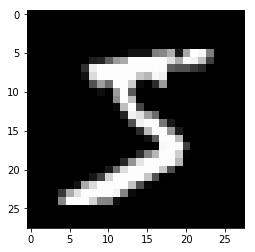

In [147]:
## Visualizing an image (optional)
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()

In [148]:
## In your homework you should transform each input data point
## into a single vector here and should transform the 
## labels into a one hot vector using np_utils.to_categorical
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)
## Also if you choose to do any data normalization (recommended)
## you should do it here
X_tr = []
X_te = []
X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)
for pt in X_train:
    pt = pt.reshape(784)
    X_tr.append(pt)
for pt in X_test:
    pt = pt.reshape(784)
    X_te.append(pt)
X_train = np.asarray(X_tr)
X_test = np.asarray(X_te)

In [149]:
X_train.shape

(60000, 784)

In [150]:
## Create your own model here given the constraints in the problem
model = Sequential()
model.add(Dense(120, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(40))
model.add(Activation('relu'))

In [151]:
## Once you one-hot encode the data labels, the line below should be predicting probabilities of each of the 10 classes
## e.g. it should read: model.add(Dense(10)), not model.add(Dense(1))
model.add(Dense(10))
model.add(Activation('softmax'))

In [152]:
## Printing a summary of the layers and weights in your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 120)               94200     
_________________________________________________________________
activation_54 (Activation)   (None, 120)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 40)                4840      
_________________________________________________________________
activation_55 (Activation)   (None, 40)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 40)                1640      
_________________________________________________________________
activation_56 (Activation)   (None, 40)                0         
__________

In [153]:
## In the line below we have specified the loss function as 'mse' (Mean Squared Error) because in the above code we did not one-hot encode the labels.
## In your implementation, since you are one-hot encoding the labels, you should use 'categorical_crossentropy' as your loss.
## You will likely have the best results with RMS prop or Adam as your optimizer.  In the line below we use Adadelta
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [164]:
fit = model.fit(X_train, y_train, batch_size=32, epochs=10,
    verbose=1)

Epoch 1/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0168 - acc: 0.9948
Epoch 2/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0167 - acc: 0.9947
Epoch 3/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0160 - acc: 0.9950
Epoch 4/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.0148 - acc: 0.9951
Epoch 5/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.0155 - acc: 0.9952
Epoch 6/10
60000/60000 [==============================] - 12s 194us/step - loss: 0.0146 - acc: 0.9954
Epoch 7/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.0147 - acc: 0.99530s - loss
Epoch 8/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.0149 - acc: 0.9953
Epoch 9/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0150 - acc: 0.9953
Epoch 10/10
60000/60000 [==============================] - 16s 270us/step 

In [165]:
## Printing the accuracy of our model, according to the loss function specified in model.compile above
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.09931705238209015
Test accuracy: 0.9806
